In [1]:
# STAT 574 Final Project Code (Python)

# Import all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras as keras
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import keras_tuner as kt
from sklearn.compose import make_column_transformer, ColumnTransformer
from tensorflow.keras.regularizers import l2
from sklearn.pipeline import Pipeline
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [2]:
phishing_data = pd.read_csv("C:/Users/coryg/OneDrive/Desktop/STAT_574_Data_Mining/PhiUSIIL_Phishing_URL_Dataset.csv", delimiter=",")
print(phishing_data.shape)
phishing_data.head(15)

(235795, 56)


,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
5,23107.txt,https://www.globalreporting.org,30,www.globalreporting.org,23,0,org,100.000000,1.000000,0.079963,...,0,0,1,35,1,11,86,0,14,1
6,23034.txt,https://www.saffronart.com,25,www.saffronart.com,18,0,com,100.000000,1.000000,0.522907,...,0,0,1,32,4,14,44,2,17,1
7,696732.txt,https://www.nerdscandy.com,25,www.nerdscandy.com,18,0,com,100.000000,1.000000,0.522907,...,0,0,1,24,2,22,36,0,15,1
8,739255.txt,https://www.hyderabadonline.in,29,www.hyderabadonline.in,22,0,in,100.000000,1.000000,0.005084,...,0,0,1,71,4,9,40,1,317,1
9,14486.txt,https://www.aap.org,18,www.aap.org,11,0,org,100.000000,1.000000,0.079963,...,0,0,1,10,1,12,173,6,65,1


In [3]:
phishing_data = phishing_data.drop(columns=["FILENAME", "URL", "Domain", "Title",
                                            "HasObfuscation", "NoOfObfuscatedChar",
                                            "ObfuscationRatio", "TLD",
                                            "NoOfAmpersandInURL","TLDLength",
                                            ], axis=1)
phishing_data.head(15)

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,NoOfSubDomain,NoOfLettersInURL,LetterRatioInURL,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,100.000000,1.000000,0.522907,0.061933,1,18,0.581,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,100.000000,0.666667,0.032650,0.050207,1,9,0.391,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,100.000000,0.866667,0.028555,0.064129,2,15,0.517,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,100.000000,1.000000,0.522907,0.057606,1,13,0.500,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,100.000000,1.000000,0.079963,0.059441,1,20,0.606,...,1,0,1,244,15,34,72,1,85,1
5,30,23,0,100.000000,1.000000,0.079963,0.060614,1,17,0.567,...,0,0,1,35,1,11,86,0,14,1
6,25,18,0,100.000000,1.000000,0.522907,0.063549,1,12,0.480,...,0,0,1,32,4,14,44,2,17,1
7,25,18,0,100.000000,1.000000,0.522907,0.060486,1,12,0.480,...,0,0,1,24,2,22,36,0,15,1
8,29,22,0,100.000000,1.000000,0.005084,0.056980,1,16,0.552,...,0,0,1,71,4,9,40,1,317,1
9,18,11,0,100.000000,1.000000,0.079963,0.070497,1,5,0.278,...,0,0,1,10,1,12,173,6,65,1


In [4]:
phishing_data = phishing_data.drop_duplicates()
print(phishing_data.shape)
phishing_data.head(15)

(234987, 46)


,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,NoOfSubDomain,NoOfLettersInURL,LetterRatioInURL,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,100.000000,1.000000,0.522907,0.061933,1,18,0.581,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,100.000000,0.666667,0.032650,0.050207,1,9,0.391,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,100.000000,0.866667,0.028555,0.064129,2,15,0.517,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,100.000000,1.000000,0.522907,0.057606,1,13,0.500,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,100.000000,1.000000,0.079963,0.059441,1,20,0.606,...,1,0,1,244,15,34,72,1,85,1
5,30,23,0,100.000000,1.000000,0.079963,0.060614,1,17,0.567,...,0,0,1,35,1,11,86,0,14,1
6,25,18,0,100.000000,1.000000,0.522907,0.063549,1,12,0.480,...,0,0,1,32,4,14,44,2,17,1
7,25,18,0,100.000000,1.000000,0.522907,0.060486,1,12,0.480,...,0,0,1,24,2,22,36,0,15,1
8,29,22,0,100.000000,1.000000,0.005084,0.056980,1,16,0.552,...,0,0,1,71,4,9,40,1,317,1
9,18,11,0,100.000000,1.000000,0.079963,0.070497,1,5,0.278,...,0,0,1,10,1,12,173,6,65,1


In [5]:
# Preprocessing Stage 2.1: Take a representative random sample of the original
# population to reduce computational complexity and to ensure machine health.

phishing_samp = phishing_data.sample(n=23499, random_state=42)
phishing_samp.head(15)

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,NoOfSubDomain,NoOfLettersInURL,LetterRatioInURL,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
157069,22,16,0,76.388889,1.000000,0.522907,0.066252,1,10,0.455,...,0,0,0,0,0,0,0,0,1,0
39763,86,22,0,21.127790,0.611111,0.522907,0.040865,0,51,0.593,...,0,0,0,0,0,0,0,0,0,0
10315,32,24,0,73.750000,0.700000,0.522907,0.050150,1,19,0.594,...,0,0,0,0,0,0,0,0,3,0
222195,34,27,0,100.000000,1.000000,0.522907,0.054219,1,21,0.618,...,0,0,1,23,51,46,55,10,31,1
67586,19,10,0,79.272727,1.000000,0.522907,0.055364,0,9,0.474,...,0,0,0,0,0,1,0,0,0,0
87857,24,17,0,100.000000,1.000000,0.001659,0.062742,1,11,0.458,...,0,0,1,16,6,5,9,0,22,1
53957,17,10,0,100.000000,1.000000,0.000981,0.055078,1,4,0.235,...,0,0,1,15,8,6,7,0,5,1
60692,34,25,0,66.720000,0.809524,0.522907,0.045640,1,16,0.471,...,1,0,0,19,3,9,1,0,4,0
200942,25,19,0,74.888889,0.750000,0.001722,0.061726,2,12,0.480,...,0,0,0,0,0,0,1,0,1,0
193489,30,23,0,100.000000,0.812500,0.010086,0.068530,2,16,0.533,...,1,0,1,19,4,8,38,0,27,1


In [6]:
phishing_corr_mat = phishing_samp.corr()
phishing_corr_mat

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,NoOfSubDomain,NoOfLettersInURL,LetterRatioInURL,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
URLLength,1.000000,0.264245,0.249462,-0.431781,-0.248412,-0.010579,-0.252644,0.058069,0.926732,0.312834,...,-0.049295,-0.024185,-0.130559,-0.064940,-0.073073,-0.098200,-0.097958,-0.034774,-0.086054,-0.239103
DomainLength,0.264245,1.000000,-0.035868,-0.415045,-0.576647,0.031474,-0.170187,0.399740,0.354844,0.541448,...,-0.056494,-0.033604,-0.191743,-0.076827,-0.082627,-0.125558,-0.119992,-0.048147,-0.098377,-0.273456
IsDomainIP,0.249462,-0.035868,1.000000,-0.108492,-0.094307,-0.047821,-0.102280,0.080202,0.265297,-0.008739,...,-0.020586,-0.007416,-0.029169,-0.015306,-0.019720,-0.027168,-0.022590,-0.009184,-0.019888,-0.055586
URLSimilarityIndex,-0.431781,-0.415045,-0.108492,1.000000,0.576207,0.167151,0.573552,-0.057729,-0.544753,-0.477508,...,0.284925,0.082250,0.616910,0.232877,0.290759,0.393070,0.347110,0.128739,0.314459,0.858393
CharContinuationRate,-0.248412,-0.576647,-0.094307,0.576207,1.000000,0.240563,0.355026,-0.487437,-0.311745,-0.294994,...,0.176195,0.056182,0.351250,0.138043,0.161679,0.232056,0.190935,0.071515,0.176255,0.466570
TLDLegitimateProb,-0.010579,0.031474,-0.047821,0.167151,0.240563,1.000000,0.278193,-0.247961,-0.000099,0.132719,...,0.117970,0.024559,0.117891,0.057147,0.029149,0.067341,0.039522,0.028096,0.051245,0.104071
URLCharProb,-0.252644,-0.170187,-0.102280,0.573552,0.355026,0.278193,1.000000,-0.069901,-0.255368,0.056964,...,0.151283,0.058590,0.351477,0.128438,0.168576,0.219334,0.181960,0.068685,0.173154,0.469641
NoOfSubDomain,0.058069,0.399740,0.080202,-0.057729,-0.487437,-0.247961,-0.069901,1.000000,0.051811,-0.044034,...,-0.028292,-0.016367,-0.009027,-0.015294,-0.005200,-0.015771,0.000569,0.000204,-0.007995,-0.007152
NoOfLettersInURL,0.926732,0.354844,0.265297,-0.544753,-0.311745,-0.000099,-0.255368,0.051811,1.000000,0.508291,...,-0.072760,-0.030340,-0.178744,-0.085579,-0.096817,-0.132915,-0.129348,-0.046433,-0.113057,-0.313292
LetterRatioInURL,0.312834,0.541448,-0.008739,-0.477508,-0.294994,0.132719,0.056964,-0.044034,0.508291,1.000000,...,-0.079433,-0.029336,-0.228396,-0.097809,-0.104703,-0.152963,-0.153071,-0.058073,-0.124452,-0.350457


Selected features after correlation-based feature selection:
Index(['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb',
       'NoOfSubDomain', 'LetterRatioInURL', 'DegitRatioInURL',
       'NoOfQMarkInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode',
       'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef'],
      dtype='object')


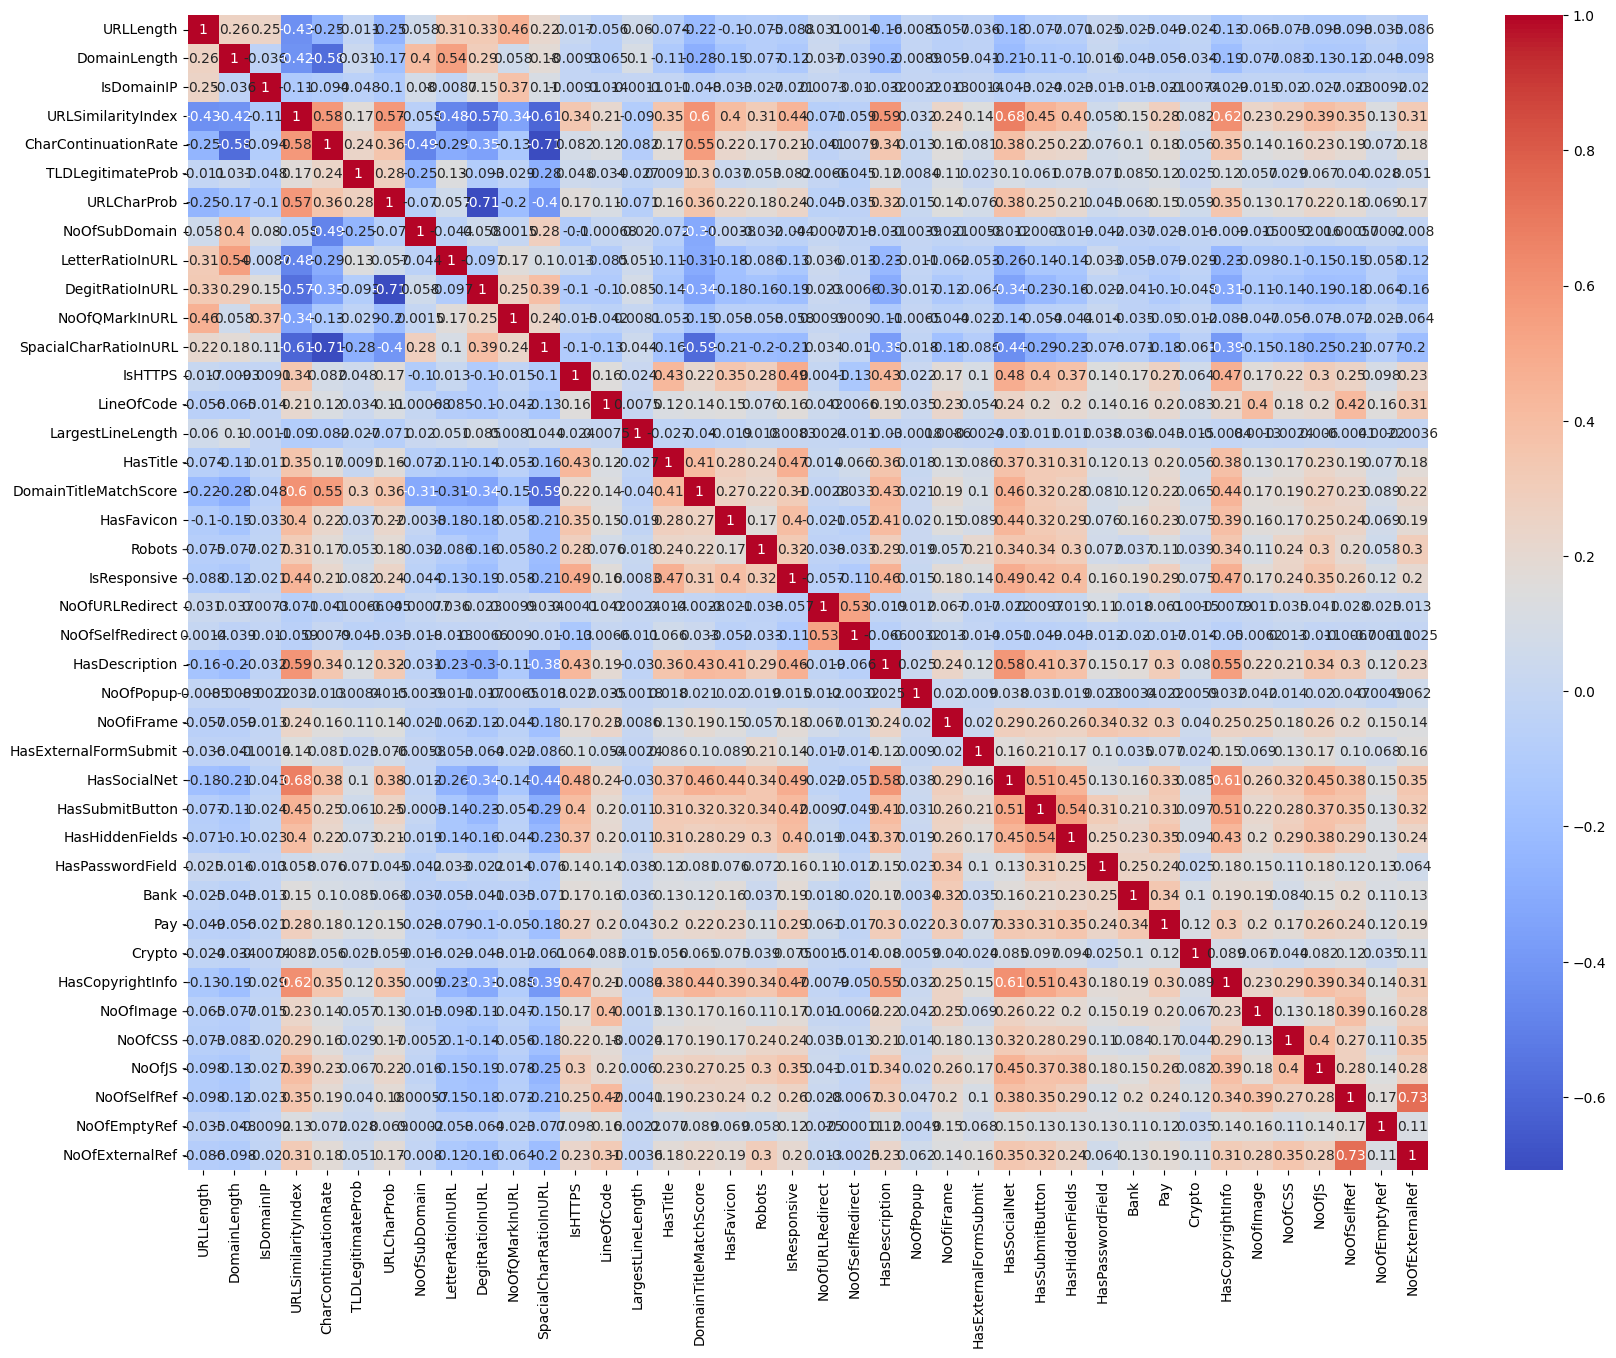

In [7]:
upper_triag = phishing_corr_mat.where(np.triu(np.ones(phishing_corr_mat.shape), 
                                              k=1).astype(bool))
to_drop = [column for column in upper_triag.columns if any(upper_triag[column] > 0.8)]
phishing_reduced = phishing_samp.drop(columns=to_drop)

print("Selected features after correlation-based feature selection:")
print(phishing_reduced.columns)

plt.figure(figsize=(20, 15))
sns.heatmap(phishing_reduced.corr(), annot=True, cmap='coolwarm') 
plt.show()

          URLLength  DomainLength    IsDomainIP  URLSimilarityIndex  \
count  23499.000000  23499.000000  23499.000000        23499.000000   
mean      34.175497     21.385080      0.002298           78.623421   
std       38.500665      9.138228      0.047883           28.843766   
min       13.000000      4.000000      0.000000            0.447426   
25%       23.000000     16.000000      0.000000           57.584095   
50%       27.000000     20.000000      0.000000          100.000000   
75%       34.000000     24.000000      0.000000          100.000000   
max     4032.000000     96.000000      1.000000          100.000000   

       CharContinuationRate  TLDLegitimateProb   URLCharProb  NoOfSubDomain  \
count          23499.000000       23499.000000  23499.000000   23499.000000   
mean               0.846476           0.261895      0.055664       1.163922   
std                0.215875           0.251691      0.010605       0.600046   
min                0.000000           0.0000

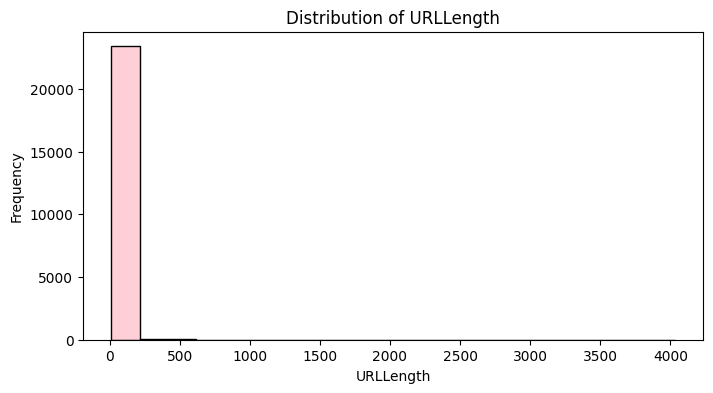

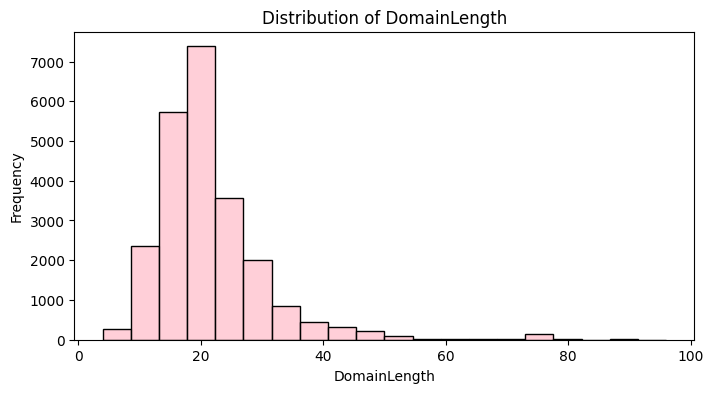

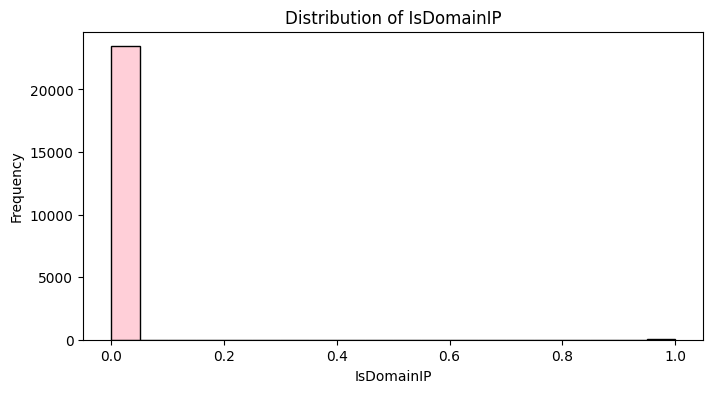

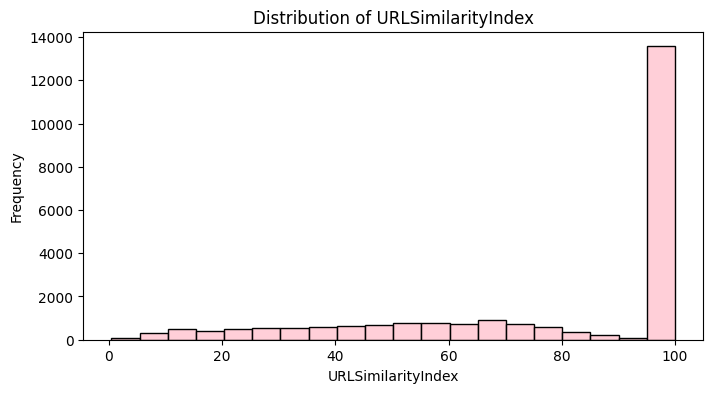

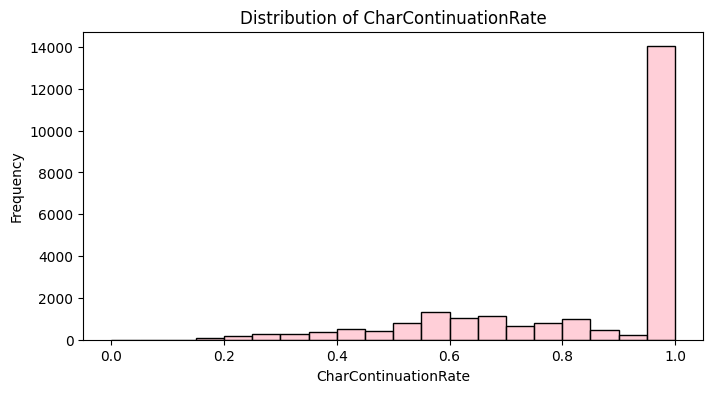

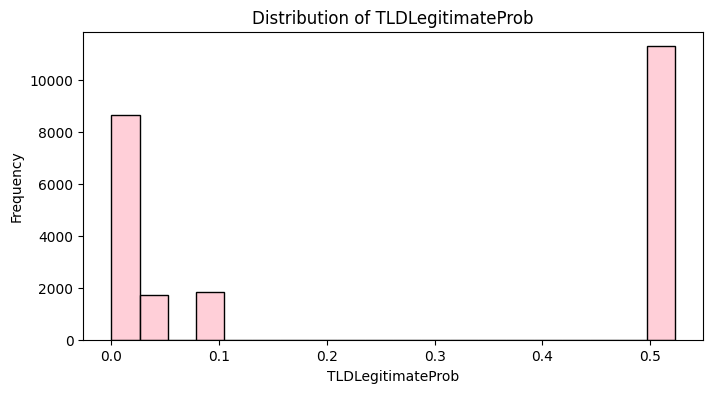

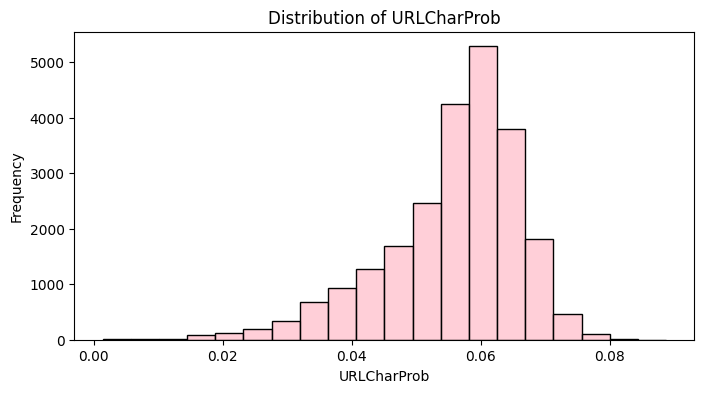

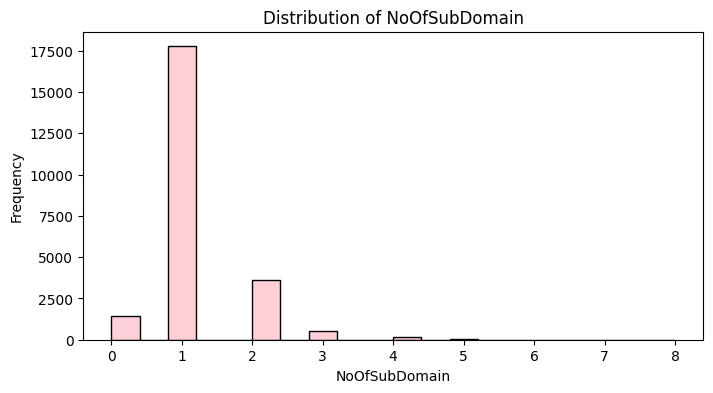

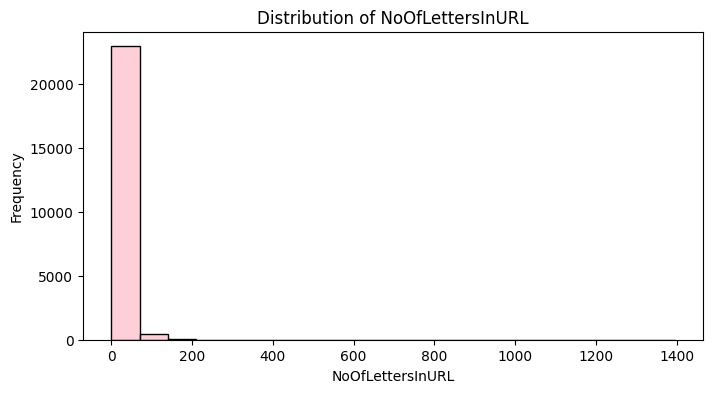

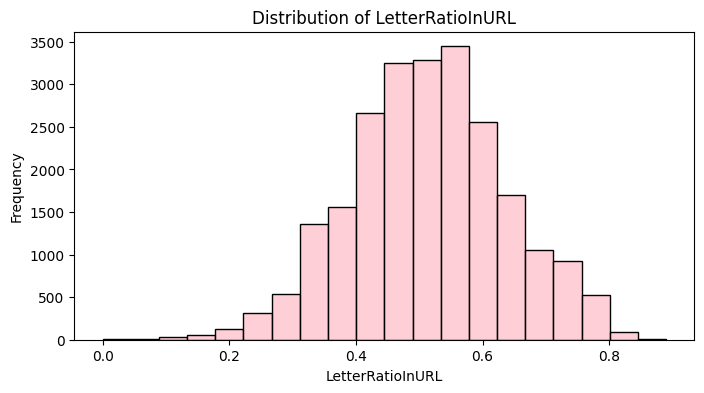

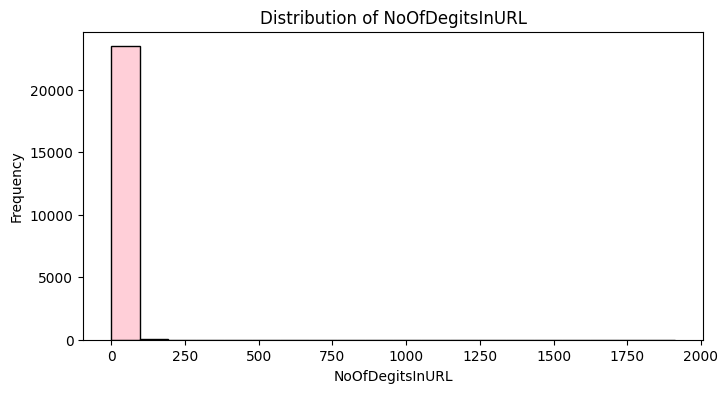

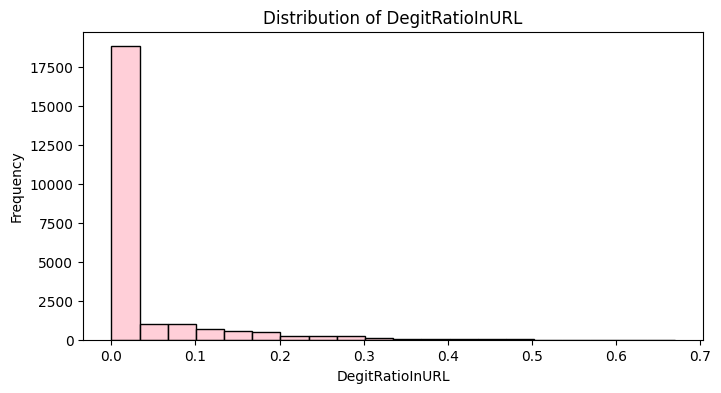

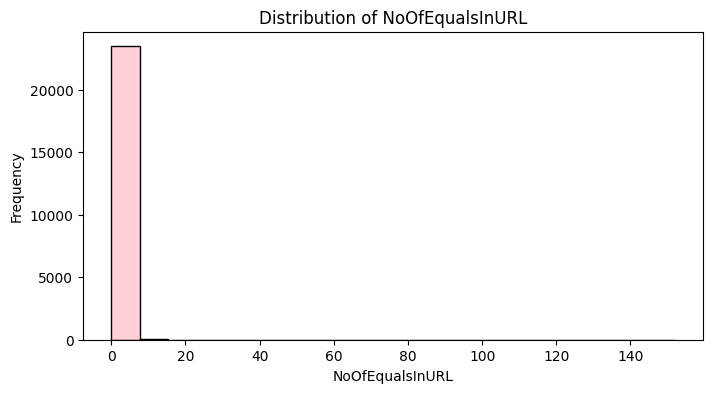

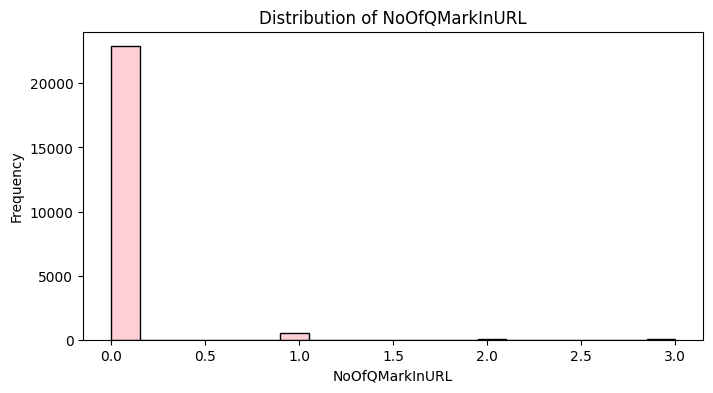

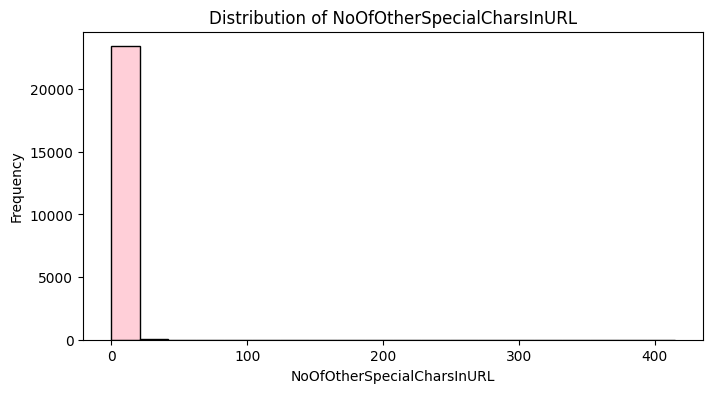

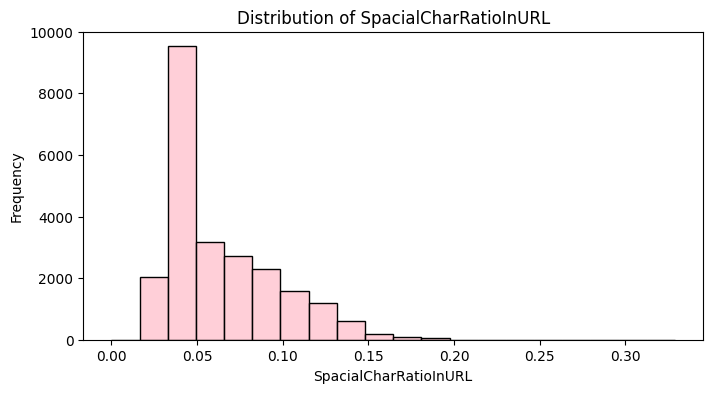

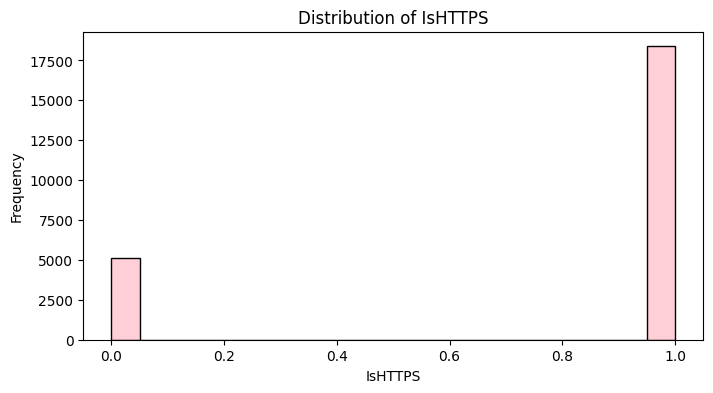

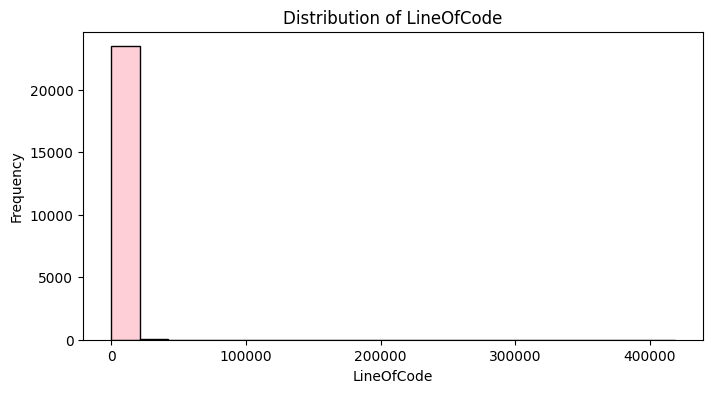

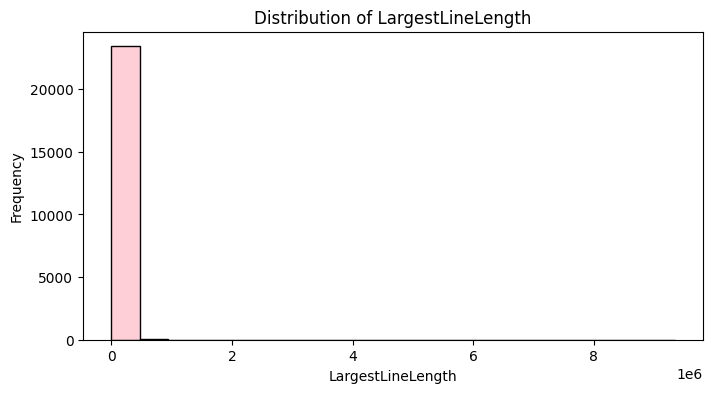

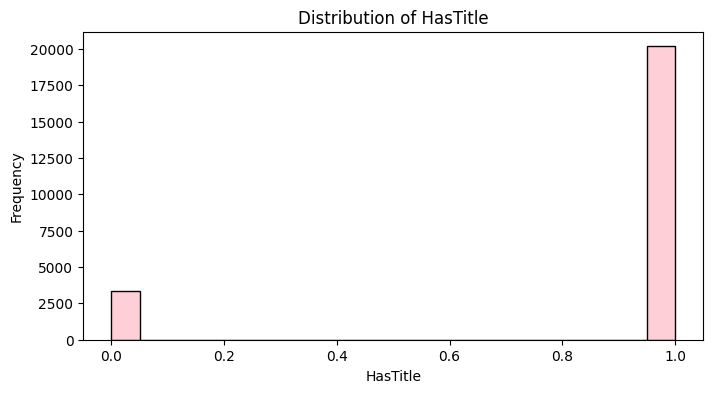

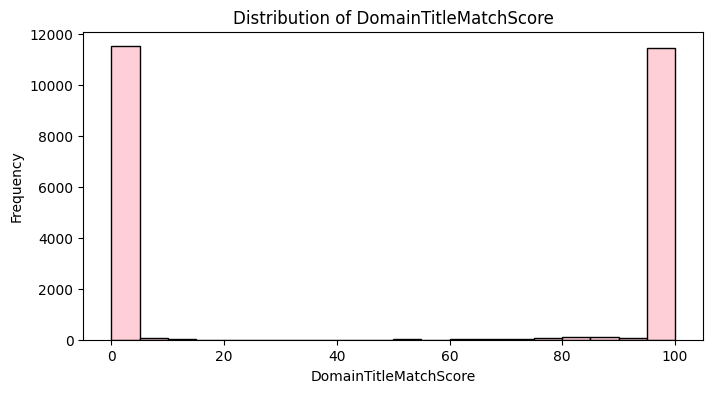

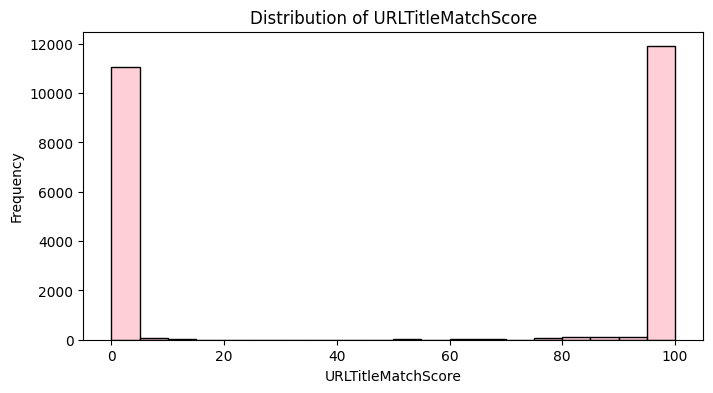

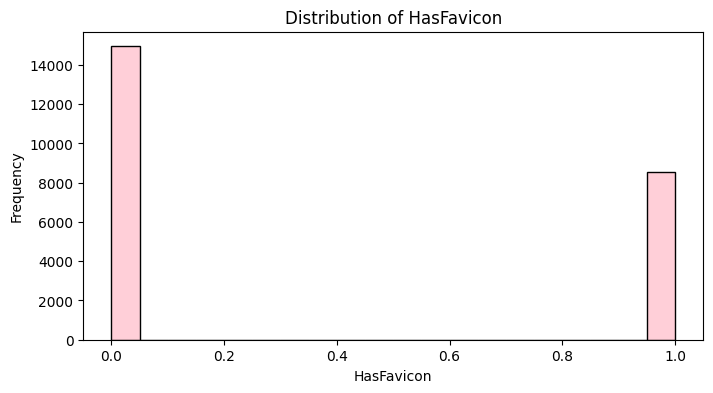

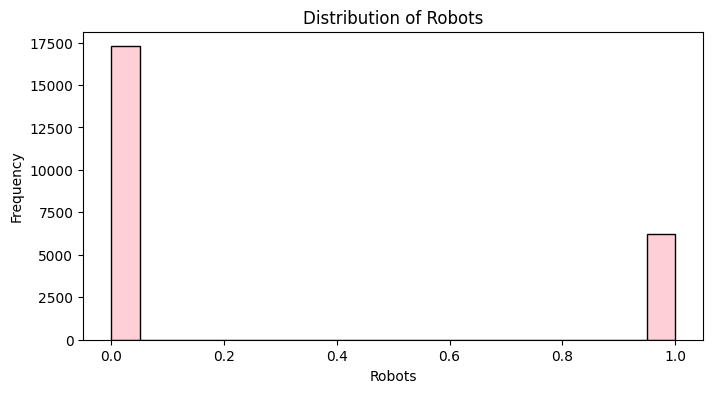

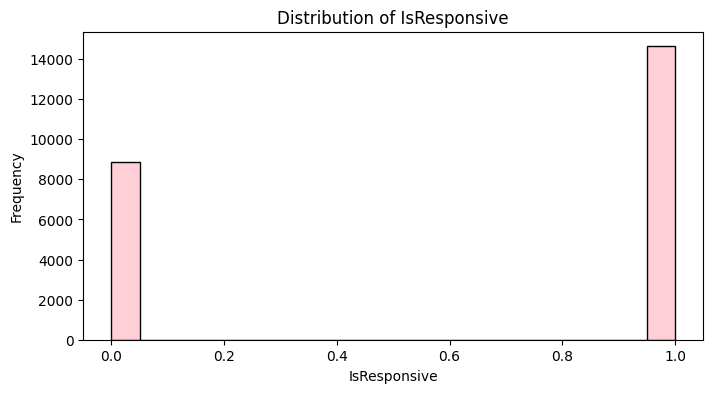

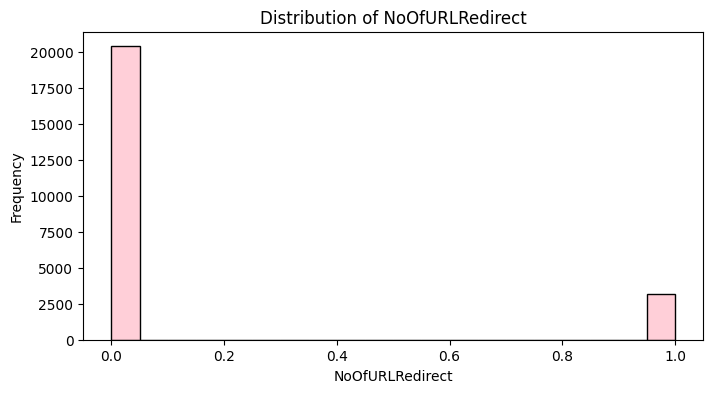

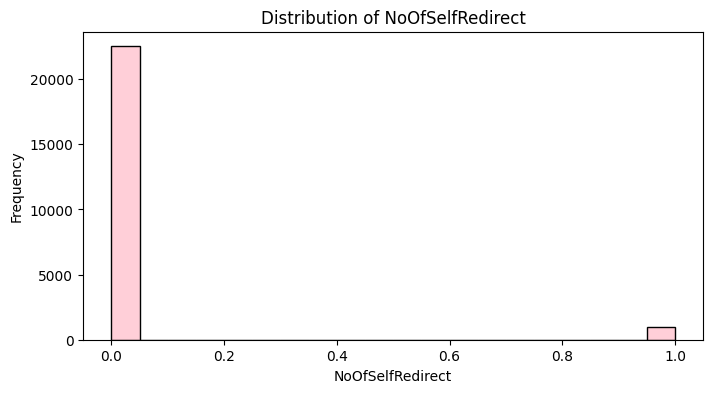

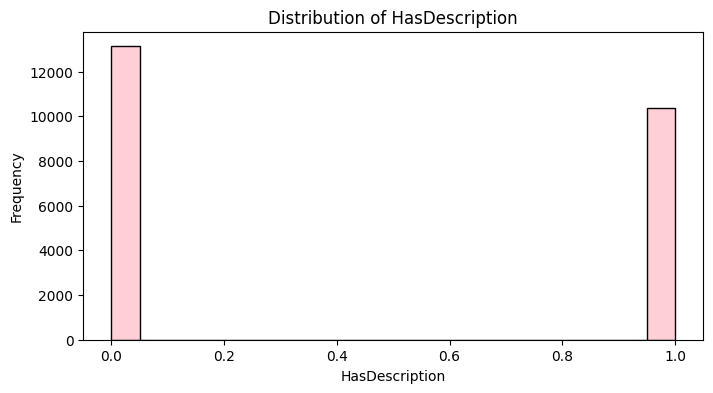

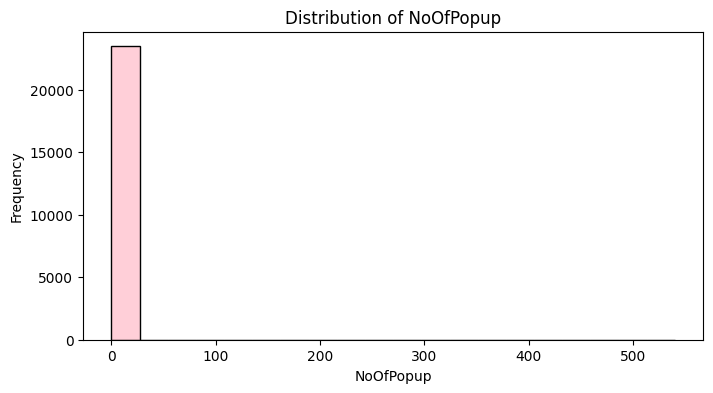

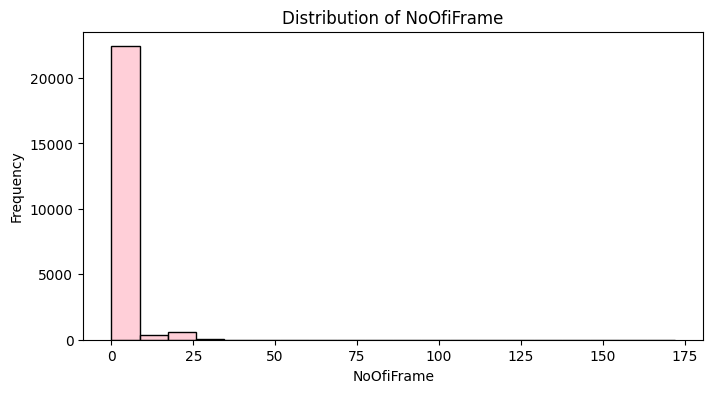

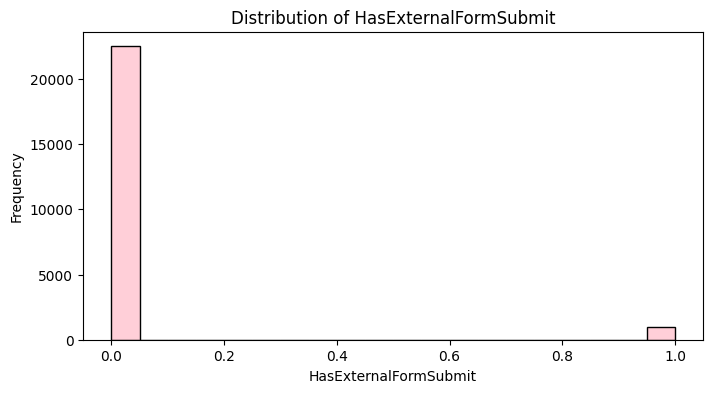

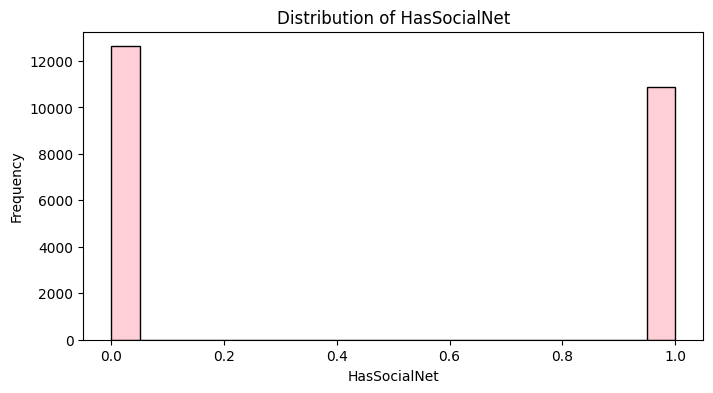

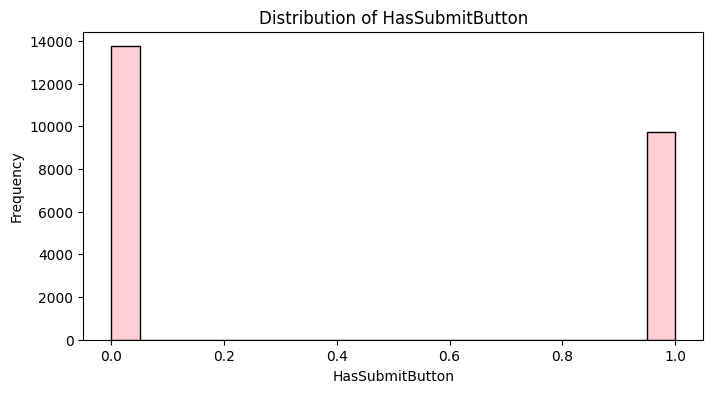

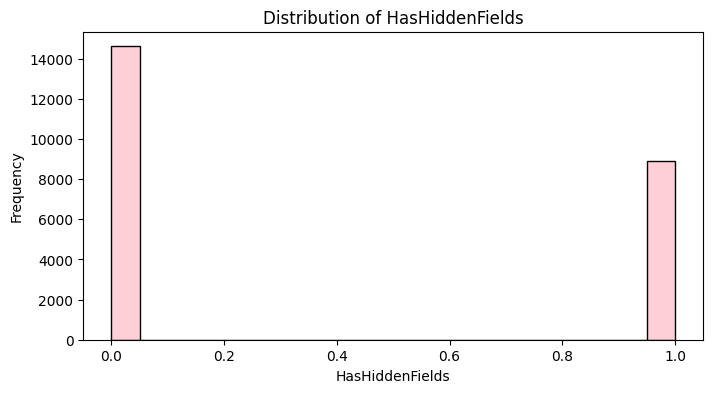

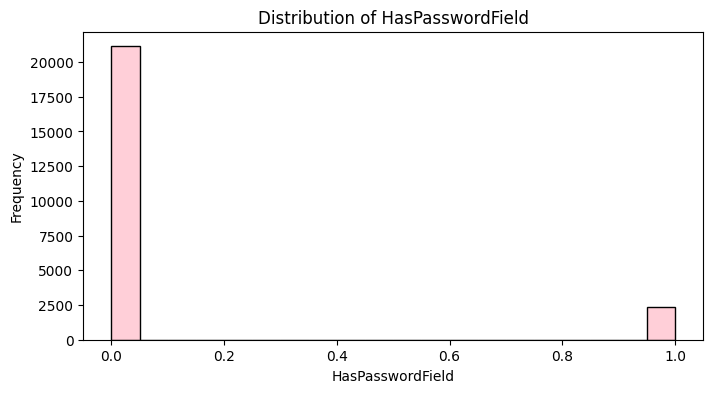

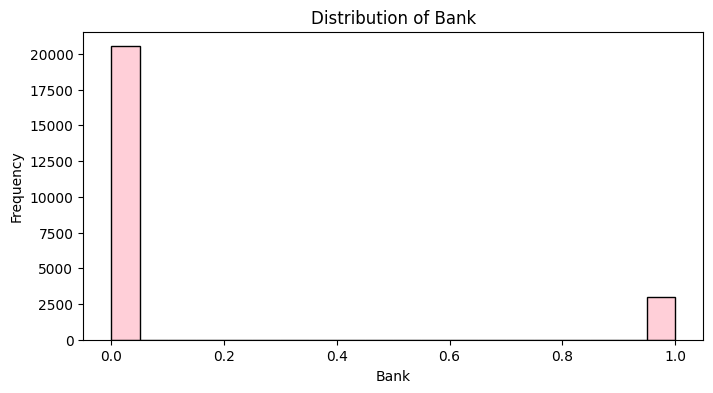

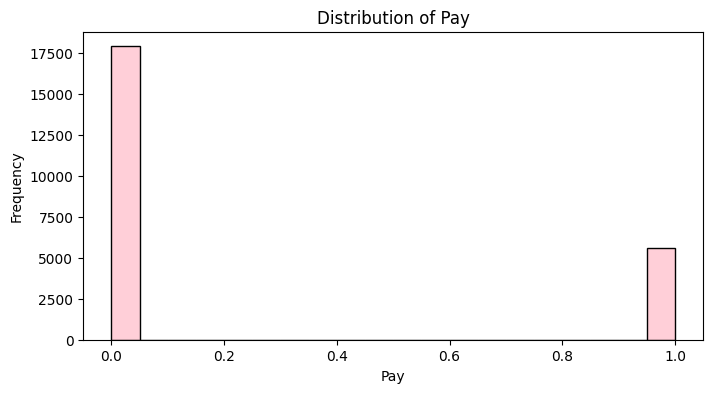

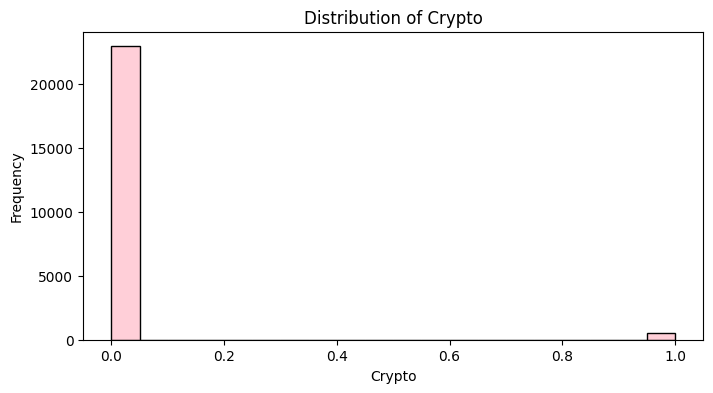

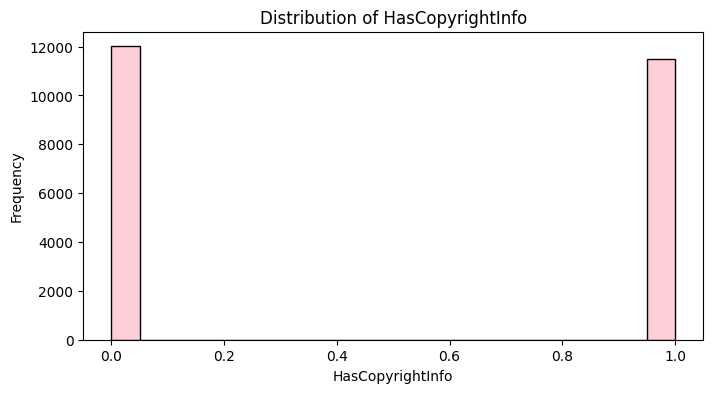

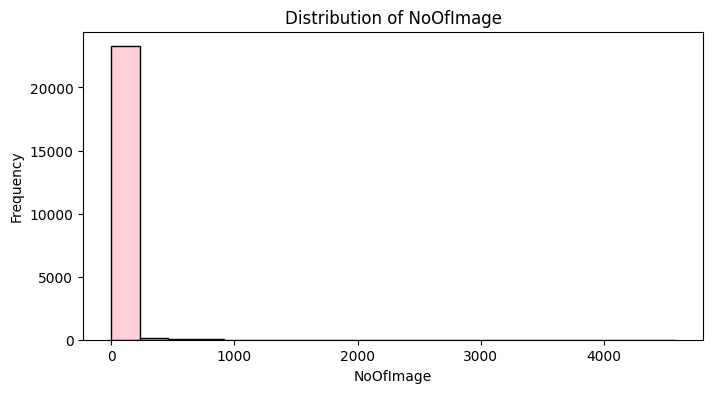

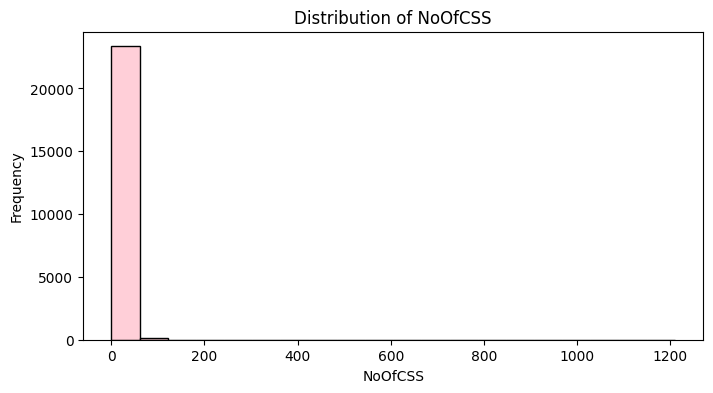

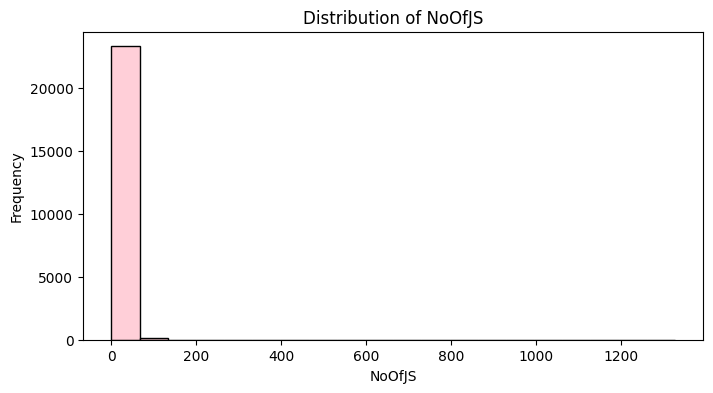

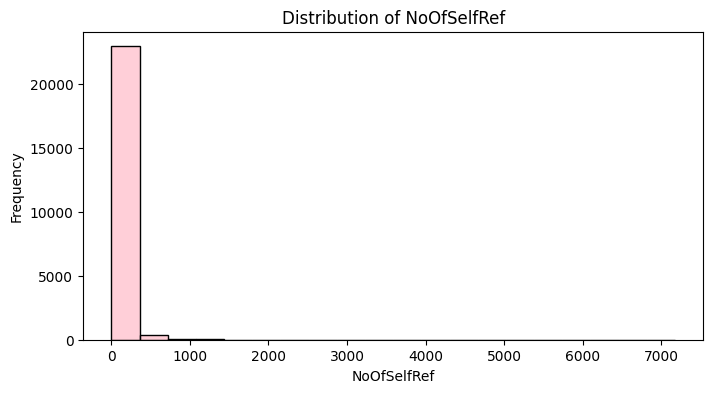

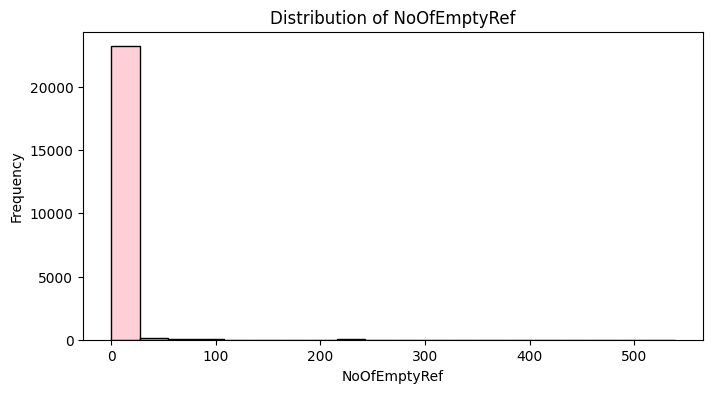

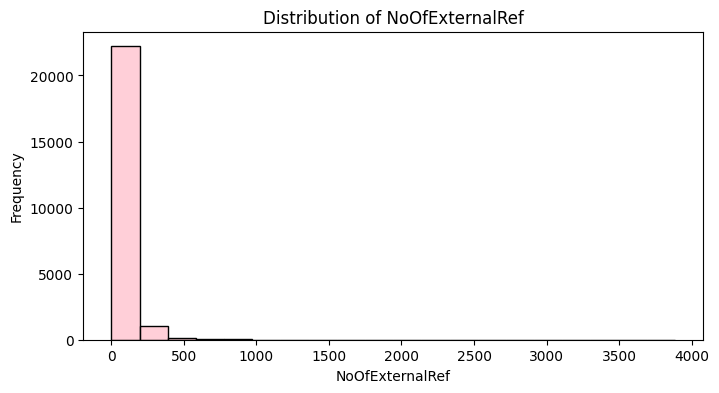

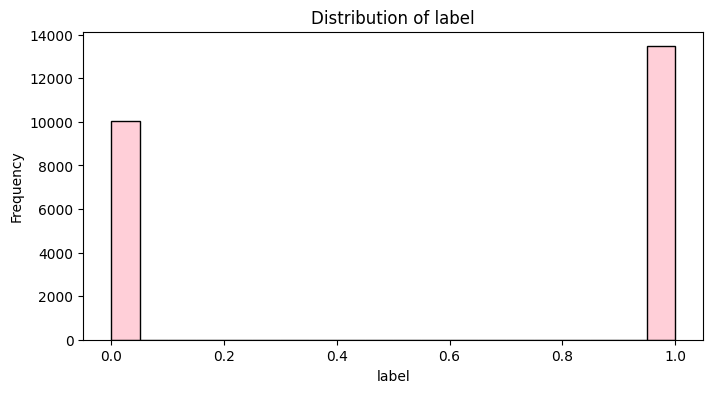

In [9]:
# Check the distribution of each feature using histograms and describe() for summary statistics. 

print(phishing_samp.describe())

for column in phishing_samp:
    plt.figure(figsize=(8,4))
    sns.histplot(phishing_samp[column], bins=20, color="pink") 
    plt.title(f"Distribution of {column}") 
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [10]:
# Preprocessing Stage: Initialize the design feature matrix and the target vector.

X_mat = phishing_samp.drop(["label"], axis=1)
y_target = phishing_samp.drop(["URLLength", "DomainLength", "IsDomainIP",
                               "CharContinuationRate",
                               "TLDLegitimateProb", "URLCharProb",
                               "NoOfSubDomain", "NoOfLettersInURL", "LetterRatioInURL",
                               "NoOfDegitsInURL", "DegitRatioInURL", "NoOfEqualsInURL",
                               "NoOfQMarkInURL", "NoOfOtherSpecialCharsInURL",
                               "SpacialCharRatioInURL", "IsHTTPS", "LineOfCode",
                               "LargestLineLength", "HasTitle", "DomainTitleMatchScore",
                               "HasFavicon", "Robots", "IsResponsive", "NoOfURLRedirect",
                               "NoOfSelfRedirect", "HasDescription", "NoOfPopup", "NoOfiFrame",
                               "HasExternalFormSubmit", "HasSocialNet", "HasSubmitButton",
                               "HasHiddenFields", "HasPasswordField", "Pay", "Bank",
                               "Crypto", "HasCopyrightInfo", "NoOfImage", "NoOfCSS",
                               "NoOfJS", "NoOfSelfRef", "NoOfEmptyRef",
                                "URLSimilarityIndex", "URLTitleMatchScore",
                                  "NoOfExternalRef"],
                               axis=1)

X_mat.head(15)

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,NoOfSubDomain,NoOfLettersInURL,LetterRatioInURL,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
157069,22,16,0,76.388889,1.000000,0.522907,0.066252,1,10,0.455,...,0,0,0,0,0,0,0,0,0,1
39763,86,22,0,21.127790,0.611111,0.522907,0.040865,0,51,0.593,...,0,0,0,0,0,0,0,0,0,0
10315,32,24,0,73.750000,0.700000,0.522907,0.050150,1,19,0.594,...,0,0,0,0,0,0,0,0,0,3
222195,34,27,0,100.000000,1.000000,0.522907,0.054219,1,21,0.618,...,0,0,0,1,23,51,46,55,10,31
67586,19,10,0,79.272727,1.000000,0.522907,0.055364,0,9,0.474,...,0,0,0,0,0,0,1,0,0,0
87857,24,17,0,100.000000,1.000000,0.001659,0.062742,1,11,0.458,...,0,0,0,1,16,6,5,9,0,22
53957,17,10,0,100.000000,1.000000,0.000981,0.055078,1,4,0.235,...,0,0,0,1,15,8,6,7,0,5
60692,34,25,0,66.720000,0.809524,0.522907,0.045640,1,16,0.471,...,1,1,0,0,19,3,9,1,0,4
200942,25,19,0,74.888889,0.750000,0.001722,0.061726,2,12,0.480,...,0,0,0,0,0,0,0,1,0,1
193489,30,23,0,100.000000,0.812500,0.010086,0.068530,2,16,0.533,...,1,1,0,1,19,4,8,38,0,27


In [11]:
print(y_target.value_counts())
y_target.head(15)

label
1        13463
0        10036
Name: count, dtype: int64


,label
157069,0
39763,0
10315,0
222195,1
67586,0
87857,1
53957,1
60692,0
200942,0
193489,1


In [12]:
# Split data into training, validation, and testing sets.
# For this model, we want to balance the variances between the hyperparameter
# estimates and the performance statistics. So we want to have majority of the 
# split attributing to training data, and then have even splits for the validation
# and test sets. Therefore we will proceed with a 80-10-10 split. 

X_train, X_temp, y_train, y_temp = train_test_split(X_mat, y_target, test_size=0.2,
                                                    random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5,
                                                    random_state=42)

In [13]:
numerical_cont = ["URLLength", "DomainLength", "URLSimilarityIndex", "CharContinuationRate",
                 "TLDLegitimateProb", "URLCharProb",
                 "NoOfLettersInURL", "LetterRatioInURL", "NoOfImage", "NoOfCSS",
                 "NoOfJS", "NoOfSelfRef", "NoOfEmptyRef", "NoOfExternalRef",
                 "NoOfSubDomain", "LargestLineLength", "LineOfCode", "NoOfDegitsInURL",
                 "DegitRatioInURL", "NoOfEqualsInURL", "NoOfQMarkInURL",
                 "NoOfOtherSpecialCharsInURL", "SpacialCharRatioInURL", "DomainTitleMatchScore",
                 "URLTitleMatchScore", "NoOfURLRedirect", "NoOfSelfRedirect", "NoOfPopup",
                 "NoOfiFrame"]

binary_feat = ["IsDomainIP", "Bank", "Pay", "Crypto", "HasCopyrightInfo",
                    "IsHTTPS", "HasTitle", "HasFavicon", "Robots", "IsResponsive",
                     "HasDescription", "HasExternalFormSubmit", "HasSocialNet",
                      "HasSubmitButton", "HasHiddenFields", "HasPasswordField"]

preprocessor = ColumnTransformer(
    transformers=[
        ('continuous', StandardScaler(), numerical_cont),
        ('binary', 'passthrough', binary_feat)
    ])

X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_valid)
X_test_transformed = preprocessor.transform(X_test)

print("Train shape: ", X_train_transformed.shape)
print("Valid shape: ", X_val_transformed.shape)
print("Test shape: ", X_test_transformed.shape)

Train shape:  (18799, 45)
Valid shape:  (2350, 45)
Test shape:  (2350, 45)


In [14]:
label_encoder = LabelEncoder()
y_train_transformed = label_encoder.fit_transform(y_train)
y_valid_transformed = label_encoder.transform(y_valid)
y_test_transformed = label_encoder.transform(y_test)

c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [15]:
# AFNN Model A

first_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(45,),
                          kernel_regularizer=l2(0.001), 
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(16, activation="relu", kernel_regularizer=l2(0.001),
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Model A Compilation and Initial Run

first_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    loss="binary_crossentropy",
                    metrics=["accuracy"])

first_history = first_model.fit(X_train_transformed, y_train_transformed, epochs=100,
                                batch_size=32, 
                                validation_data=(X_val_transformed, 
                                                 y_valid_transformed))

Epoch 1/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8232 - loss: 0.5467 - val_accuracy: 0.9987 - val_loss: 0.1320
Epoch 2/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9898 - loss: 0.1562 - val_accuracy: 0.9996 - val_loss: 0.0931
Epoch 3/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9928 - loss: 0.1058 - val_accuracy: 0.9996 - val_loss: 0.0664
Epoch 4/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9945 - loss: 0.0751 - val_accuracy: 1.0000 - val_loss: 0.0474
Epoch 5/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9972 - loss: 0.0554 - val_accuracy: 1.0000 - val_loss: 0.0354
Epoch 6/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9972 - loss: 0.0419 - val_accuracy: 1.0000 - val_loss: 0.0277
Epoch 7/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9980 - loss: 0.0345 - val_accuracy: 1.0000 - val_loss: 0.0223
Epoch 8/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9978 - loss: 0.0284 - val_accu

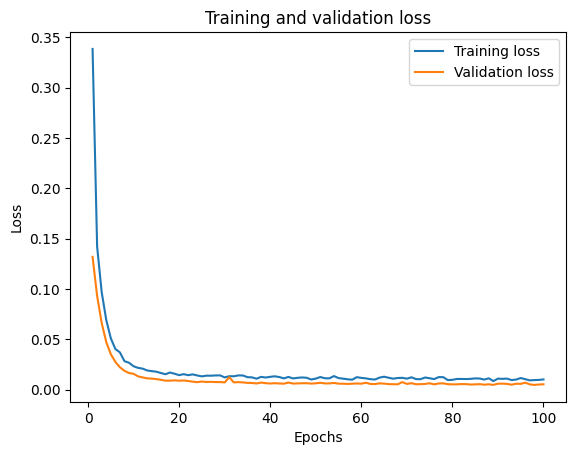

In [17]:
# Model A Performance Metric Analysis: Training and Validation Loss Plots

loss = first_history.history['loss']
val_loss = first_history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

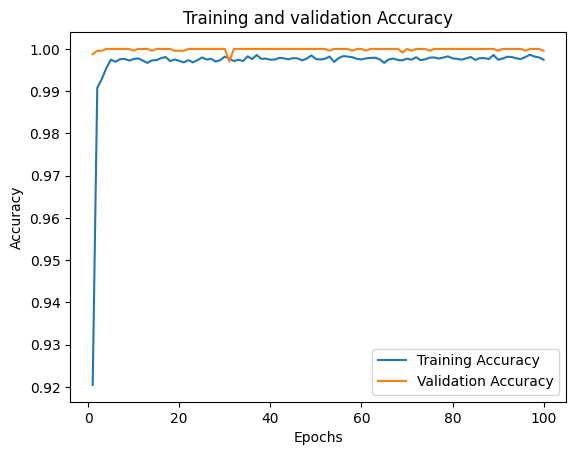

In [18]:
# Model A Performance Metric Analysis: Training and Validation Set Accuracy Plot

accuracy = first_history.history['accuracy']
val_accuracy = first_history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, accuracy,  label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


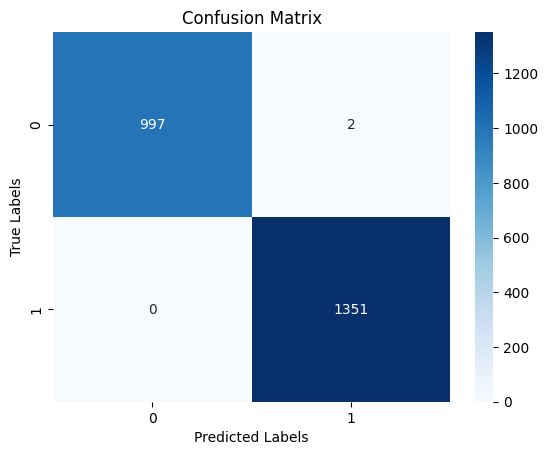

In [26]:
y_preds_first = first_model.predict(X_test_transformed)
y_pred = np.where(y_preds_first>0.5, 1, 0)
cm_first = confusion_matrix(y_test_transformed, y_pred)
cm_first

sns.heatmap(cm_first, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [27]:
roc_auc_sc1 = roc_auc_score(y_test_transformed, y_pred)
print(roc_auc_sc1)

0.998998998998999


In [21]:
def skeleton_model(hyper):
    n_hidden = hyper.Int("n_hidden", min_value=0, max_value=10, default=2)
    n_neurons = hyper.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hyper.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                                sampling="log") 
    optimizer = hyper.Choice("optimizer", 
                             values = ["SGD", "Adam", "RMSProp", "Nadam", "Adamax",
                                       ])
    
    if optimizer == "SGD":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == "Adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == "RMSProp":
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate,
                                                rho = 0.9)
    elif optimizer == "Nadam":
        optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adamax(learning_rate=learning_rate)

    samp_model = tf.keras.Sequential()
    samp_model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        samp_model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    samp_model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    samp_model.compile(loss="binary_crossentropy", optimizer=optimizer,
                       metrics=["accuracy"])
    return samp_model

In [22]:
random_search_tuner = kt.RandomSearch(
    skeleton_model, objective="val_accuracy", max_trials=6,
    seed=42
)
random_search_tuner.search(X_train_transformed, y_train_transformed, epochs=10, verbose=1,
                           validation_data=(X_val_transformed, y_valid_transformed))

Reloading Tuner from .\untitled_project\tuner0.json


In [23]:
top_3_hps = random_search_tuner.get_best_hyperparameters(num_trials=3)

for i, hp in enumerate(top_3_hps):
    print(f"Top {i+1} hyperparameters:") 
    print(hp.values)

Top 1 hyperparameters:
{'n_hidden': 6, 'n_neurons': 70, 'learning_rate': 0.00041268008323824807, 'optimizer': 'RMSProp'}
Top 2 hyperparameters:
{'n_hidden': 5, 'n_neurons': 74, 'learning_rate': 0.00905127409782462, 'optimizer': 'Nadam'}
Top 3 hyperparameters:
{'n_hidden': 7, 'n_neurons': 25, 'learning_rate': 0.0006562536901904111, 'optimizer': 'Adam'}


In [ ]:
# Using the best hyperparameter set out of top 3 displayed.

first_model = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation="relu", input_shape=(45,),
                          kernel_regularizer=l2(0.001), 
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(16, activation="relu", kernel_regularizer=l2(0.001),
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(4, activation="relu", kernel_regularizer=l2(0.001),
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

first_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007),
                    loss="binary_crossentropy",
                    metrics=["accuracy"])

first_history = first_model.fit(X_train_transformed, y_train_transformed, epochs=20,
                                batch_size=32, 
                                validation_data=(X_val_transformed, 
                                                 y_valid_transformed))

Epoch 1/20


c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


588/588 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5986 - loss: 0.9136 - val_accuracy: 0.9855 - val_loss: 0.3107
Epoch 2/20
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7920 - loss: 0.4893 - val_accuracy: 0.9962 - val_loss: 0.1275
Epoch 3/20
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8853 - loss: 0.3406 - val_accuracy: 0.9979 - val_loss: 0.0939
Epoch 4/20
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9005 - loss: 0.2992 - val_accuracy: 0.9991 - val_loss: 0.0756
Epoch 5/20
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9065 - loss: 0.2675 - val_accuracy: 0.9996 - val_loss: 0.0649
Epoch 6/20
588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9154 - loss: 0.2486 - val_accuracy: 0.9996 - val_loss: 0.0558
Epoch 7/20
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9205 - loss: 0.2310 - val_accuracy: 0.9996 - val_loss: 0.0479
Epoch 8/20
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9196 - loss: 0.2196 - val_accuracy: 0.9996 - val_

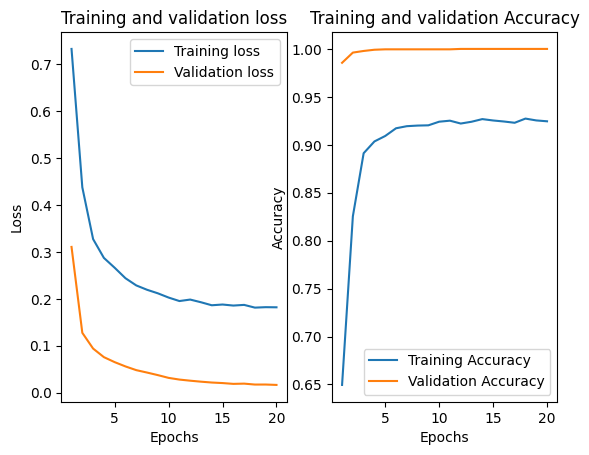

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9994 - loss: 0.0168
Test loss 0.0172
Test accuracy 0.9991
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


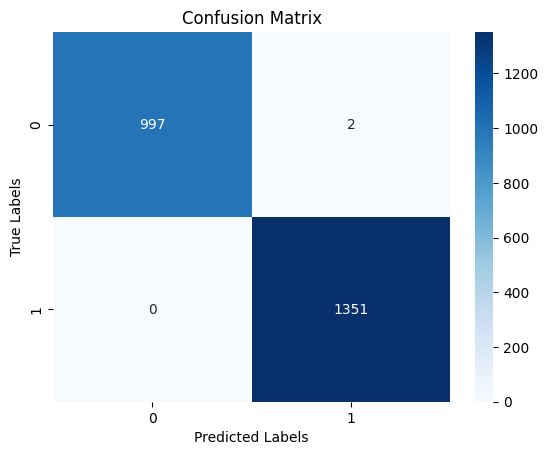

In [25]:
loss = first_history.history['loss']
val_loss = first_history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,1)
plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

accuracy = first_history.history['accuracy']
val_accuracy = first_history.history['val_accuracy']

plt.subplot(1,2,2)
plt.plot(epochs, accuracy,  label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

test_loss, test_accuracy = first_model.evaluate(X_test_transformed, y_test_transformed)

print("Test loss {:.4f}".format(test_loss))
print("Test accuracy {:.4f}".format(test_accuracy))

y_preds_first = first_model.predict(X_test_transformed)
y_pred = np.where(y_preds_first>0.5, 1, 0)
cm_first = confusion_matrix(y_test_transformed, y_pred)

sns.heatmap(cm_first, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()